Task Goal
Calculate the probability of being born in Canada in a particular year, using World Bank data on:

- Birth Rate (SP.DYN.CBRT.IN) → births per 1,000 people
https://api.worldbank.org/v2/country/all/indicator/SP.DYN.CBRT.IN

- Total Population (SP.POP.TOTL) → total country population per year
https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL

births = (birth_rate / 1000) * population
probability = births_canada / births_world


#### Fetch Data, world population and birth rate

In [3]:
# fetch birth rate for all countries
import wbgapi as wb
import pandas as pd
import pprint
import requests

date='1960:2025'
page = 1
data = []
while True:
    url = f'https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date={date}&format=json&page={page}'
    response = requests.get(url)
    response_json = response.json()
    data +=response_json[1]
    if page >= response_json[0]['pages']:
        break
    page+=1
print(data)
# data = response.json()
# print('page: ',data[0]['pages'])
# print('code: ',dd[1][49]['countryiso3code'])
# print('country: ',dd[1][49]['country']['value'])
# print('year: ',dd[1][49]['date'])
# print('population: ',dd[1][49]['value'])
totl_pop_country_wise_dump = pd.json_normalize(data)
totl_pop_country_wise = totl_pop_country_wise_dump[['countryiso3code','country.value','date','value']]
totl_pop_country_wise.columns=['code','country','year','population']
print(totl_pop_country_wise.head())
print(len(totl_pop_country_wise))

# **** refector due to using url ****
# population fetch
# time=range(2019,2024)
# economy='all'
# series_totl_pop='SP.POP.TOTL'

# totl_pop_country_wise_dump = wb.data.DataFrame(series_totl_pop,economy=economy,time=time,labels=True).reset_index()
# print(totl_pop_country_wise_dump.head())
# pprint.pprint(totl_pop_country_wise_dump.head())
# **** refector due to using url ****

[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2024', 'value': 769294618, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2023', 'value': 750503764, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2022', 'value': 731821393, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2021', 'value': 713090928, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.POP.TOTL', 'value'

In [4]:
#condition population data
# **** refector due to using url ****
# totl_pop_country_wise = totl_pop_country_wise_dump.melt(
#     id_vars=['economy','Country'],
#     var_name='year',
#     value_name='population'
# )
# totl_pop_country_wise.columns=['code','country','year','population']
# totl_pop_country_wise['year']=totl_pop_country_wise['year'].str.replace('YR','').astype(int)
# print(totl_pop_country_wise.head())
# print(len(totl_pop_country_wise))
# **** refector due to using url ****

print(totl_pop_country_wise.head())
totl_pop_by_year = totl_pop_country_wise.groupby('year')['population'].sum().reset_index()
print(totl_pop_by_year.head())

  code                      country  year   population
0  AFE  Africa Eastern and Southern  2024  769294618.0
1  AFE  Africa Eastern and Southern  2023  750503764.0
2  AFE  Africa Eastern and Southern  2022  731821393.0
3  AFE  Africa Eastern and Southern  2021  713090928.0
4  AFE  Africa Eastern and Southern  2020  694446100.0
   year    population
0  1960  3.046620e+10
1  1961  3.088985e+10
2  1962  3.146031e+10
3  1963  3.216525e+10
4  1964  3.287651e+10


In [5]:
# **** refector due to using url ****
# # fetch birth rate data
# time=range(1960,2024)
# economy='all'
# series2='SP.DYN.CBRT.IN'

# birth_rate_country_wise_dump = wb.data.DataFrame(series=series2,economy=economy,time=time,labels=True).reset_index()
# print(birth_rate_country_wise_dump.head())
# **** refector due to using url ****
page = 1
data = []
while True:
    url = f'https://api.worldbank.org/v2/country/all/indicator/SP.DYN.CBRT.IN?date={date}&format=json&page={page}'
    response = requests.get(url)
    response_json = response.json()
    data +=response_json[1]
    if page >= response_json[0]['pages']:
        break
    page+=1
print(data)
# data = response.json()
# print('page: ',data[0]['pages'])
# print('code: ',dd[1][49]['countryiso3code'])
# print('country: ',dd[1][49]['country']['value'])
# print('year: ',dd[1][49]['date'])
# print('population: ',dd[1][49]['value'])
birth_rate_country_wise_dump = pd.json_normalize(data)
birth_rate_country_wise = birth_rate_country_wise_dump[['countryiso3code','country.value','date','value']]
birth_rate_country_wise.columns=['code','country','year','birthrate']
print(birth_rate_country_wise.head())
print(len(birth_rate_country_wise))


[{'indicator': {'id': 'SP.DYN.CBRT.IN', 'value': 'Birth rate, crude (per 1,000 people)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2024', 'value': None, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.DYN.CBRT.IN', 'value': 'Birth rate, crude (per 1,000 people)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2023', 'value': 32.9549116035093, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.DYN.CBRT.IN', 'value': 'Birth rate, crude (per 1,000 people)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2022', 'value': 33.3204330526369, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'SP.DYN.CBRT.IN', 'value': 'Birth rate, crude (per 1,000 people)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2021', 'value': 33

There is a data of INX having NaN for birthrate, same is replaced with mean() of the entire column in order to keep the birthrate newtral.

In [6]:
# condition population data
# **** refector due to using url ****
# birth_rate_country_wise = birth_rate_country_wise_dump.melt(
#     id_vars=['economy','Country'],
#     var_name='year',
#     value_name='birthrate'
# )
# birth_rate_country_wise.columns=['code','country','year','birthrate']
# birth_rate_country_wise['year']=birth_rate_country_wise['year'].str.replace('YR','').astype(int)
# print(birth_rate_country_wise.head())
# print(len(birth_rate_country_wise))
# **** refector due to using url ****

na_count = birth_rate_country_wise.isna().sum().reset_index()
print(na_count)
print(birth_rate_country_wise[birth_rate_country_wise.isna().any(axis=1)])
# if(birth_rate_country_wise[birth_rate_country_wise['code']=='INX']):
birth_rate_country_wise['birthrate']= birth_rate_country_wise['birthrate'].fillna(birth_rate_country_wise['birthrate'].mean())

       index    0
0       code    0
1    country    0
2       year    0
3  birthrate  360
      code                         country  year  birthrate
0      AFE     Africa Eastern and Southern  2024        NaN
65     AFW      Africa Western and Central  2024        NaN
130    ARB                      Arab World  2024        NaN
195    CSS          Caribbean small states  2024        NaN
260    CEB  Central Europe and the Baltics  2024        NaN
...    ...                             ...   ...        ...
17093  PSE              West Bank and Gaza  1961        NaN
17094  PSE              West Bank and Gaza  1960        NaN
17095  YEM                     Yemen, Rep.  2024        NaN
17160  ZMB                          Zambia  2024        NaN
17225  ZWE                        Zimbabwe  2024        NaN

[360 rows x 4 columns]


C:\Users\shaik\AppData\Local\Temp\ipykernel_16984\23919900.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_rate_country_wise['birthrate']= birth_rate_country_wise['birthrate'].fillna(birth_rate_country_wise['birthrate'].mean())


Store data in sqlite database for futher calculations

In [7]:
#create data base, and create tables to store population and birthrate data
import sqlite3

conn = sqlite3.connect('mapleroot.db',isolation_level=None)
totl_pop_country_wise.to_sql('tbl_totl_county_pop',conn,if_exists='replace',index='False')
totl_pop_by_year.to_sql('tbl_totl_pop',conn,if_exists='replace',index=False)
birth_rate_country_wise.to_sql('tbl_br_cnt',conn,if_exists='replace',index=False)
print(conn.execute('SELECT name FROM sqlite_schema WHERE type="table"').fetchall())
print(conn.execute('PRAGMA TABLE_INFO("tbl_totl_pop")').fetchall())
print(conn.execute('PRAGMA TABLE_INFO("tbl_br_cnt")').fetchall())
conn.close()

[('tbl_totl_county_pop',), ('tbl_totl_pop',), ('tbl_br_cnt',)]
[(0, 'year', 'TEXT', 0, None, 0), (1, 'population', 'REAL', 0, None, 0)]
[(0, 'code', 'TEXT', 0, None, 0), (1, 'country', 'TEXT', 0, None, 0), (2, 'year', 'TEXT', 0, None, 0), (3, 'birthrate', 'REAL', 0, None, 0)]


In [8]:
# create a table for Canada, code, year, C_birthrate, w_birthrate, c_pop, w_pop, c_ttl_birth, w_ttl_birth, c_probability
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
quary = 'SELECT * FROM tbl_br_cnt'
df_br_sql = pd.read_sql(quary,conn)
# print(df_br_sql.head())

quary = 'SELECT * FROM tbl_totl_pop'
df_ttl_pop_sql = pd.read_sql(quary,conn)
# print(df_ttl_pop_sql)

df_maple_roots = df_br_sql[df_br_sql['code']=='CAN'].reset_index()
# print(len(df_maple_roots))
# print(df_maple_roots.columns)

df_maple_roots.rename(columns={"birthrate":"c_birthyear"},inplace=True)

# column: c_pop
quary = 'SELECT * FROM tbl_totl_county_pop WHERE code="CAN"'
df_can_pop = pd.read_sql(quary,conn)
# print(df_can_pop.head())
df_maple_roots = df_maple_roots.merge(
    df_can_pop[['code','year','population']],
    on=['code','year'],
    how='left'
)
df_maple_roots.rename(columns={'population':'c_population'},inplace=True)
print(df_maple_roots.head())
conn.close()



   index code country  year  c_birthyear  c_population
0   5460  CAN  Canada  2024    27.889887    41288599.0
1   5461  CAN  Canada  2023     8.800000    40083484.0
2   5462  CAN  Canada  2022     9.000000    38935934.0
3   5463  CAN  Canada  2021     9.700000    38239864.0
4   5464  CAN  Canada  2020     9.500000    38028638.0


In [9]:
# add world birth rate from table tbl_br_cnt
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
quary = 'SELECT year, AVG(birthrate) AS w_birthrate FROM tbl_br_cnt GROUP BY year'
w_birthrate_df = pd.read_sql(quary,conn)
print(w_birthrate_df.head())
df_maple_roots = df_maple_roots.merge(
    w_birthrate_df[['year','w_birthrate']],
    on=['year'],
    how='left'
)
print(df_maple_roots.head())
conn.close()

   year  w_birthrate
0  1960    37.979542
1  1961    37.607086
2  1962    37.745164
3  1963    37.596513
4  1964    37.084510
   index code country  year  c_birthyear  c_population  w_birthrate
0   5460  CAN  Canada  2024    27.889887    41288599.0    27.889887
1   5461  CAN  Canada  2023     8.800000    40083484.0    17.843165
2   5462  CAN  Canada  2022     9.000000    38935934.0    18.166692
3   5463  CAN  Canada  2021     9.700000    38239864.0    18.570671
4   5464  CAN  Canada  2020     9.500000    38028638.0    18.838700


In [10]:
# add world population from table tbl_totl_pop
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
quary = 'SELECT year, population as w_population FROM tbl_totl_pop'
totl_pop_df = pd.read_sql(quary,conn)
print(totl_pop_df.head())
df_maple_roots = df_maple_roots.merge(
    totl_pop_df[['year','w_population']],
    on=['year'],
    how='left'
)
print(df_maple_roots.head())
conn.close()

   year  w_population
0  1960  3.046620e+10
1  1961  3.088985e+10
2  1962  3.146031e+10
3  1963  3.216525e+10
4  1964  3.287651e+10
   index code country  year  c_birthyear  c_population  w_birthrate  \
0   5460  CAN  Canada  2024    27.889887    41288599.0    27.889887   
1   5461  CAN  Canada  2023     8.800000    40083484.0    17.843165   
2   5462  CAN  Canada  2022     9.000000    38935934.0    18.166692   
3   5463  CAN  Canada  2021     9.700000    38239864.0    18.570671   
4   5464  CAN  Canada  2020     9.500000    38028638.0    18.838700   

   w_population  
0  8.795003e+10  
1  8.703543e+10  
2  8.615821e+10  
3  8.531826e+10  
4  8.448114e+10  


In [11]:
# correct error on column name
df_maple_roots.rename(columns={'c_birthyear':'c_birthrate'},inplace=True)
print(df_maple_roots.head())

   index code country  year  c_birthrate  c_population  w_birthrate  \
0   5460  CAN  Canada  2024    27.889887    41288599.0    27.889887   
1   5461  CAN  Canada  2023     8.800000    40083484.0    17.843165   
2   5462  CAN  Canada  2022     9.000000    38935934.0    18.166692   
3   5463  CAN  Canada  2021     9.700000    38239864.0    18.570671   
4   5464  CAN  Canada  2020     9.500000    38028638.0    18.838700   

   w_population  
0  8.795003e+10  
1  8.703543e+10  
2  8.615821e+10  
3  8.531826e+10  
4  8.448114e+10  


### calculation
total Canada birth, total world birth, then calculate probability of birth in Canada compared to world

In [12]:
# calculate total birth in Canada
df_maple_roots['c_birth'] = (df_maple_roots['c_birthrate'] * df_maple_roots['c_population'])/1000
df_maple_roots['w_birth'] = (df_maple_roots['w_birthrate'] * df_maple_roots['w_population'])/1000
df_maple_roots['c_probability'] = (df_maple_roots['c_birth'] / df_maple_roots['w_birth'])
print(df_maple_roots.head())

   index code country  year  c_birthrate  c_population  w_birthrate  \
0   5460  CAN  Canada  2024    27.889887    41288599.0    27.889887   
1   5461  CAN  Canada  2023     8.800000    40083484.0    17.843165   
2   5462  CAN  Canada  2022     9.000000    38935934.0    18.166692   
3   5463  CAN  Canada  2021     9.700000    38239864.0    18.570671   
4   5464  CAN  Canada  2020     9.500000    38028638.0    18.838700   

   w_population       c_birth       w_birth  c_probability  
0  8.795003e+10  1.151534e+06  2.452916e+09       0.000469  
1  8.703543e+10  3.527347e+05  1.552988e+09       0.000227  
2  8.615821e+10  3.504234e+05  1.565210e+09       0.000224  
3  8.531826e+10  3.709267e+05  1.584417e+09       0.000234  
4  8.448114e+10  3.612721e+05  1.591515e+09       0.000227  


C:\Users\shaik\AppData\Local\Temp\ipykernel_16984\2045626642.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


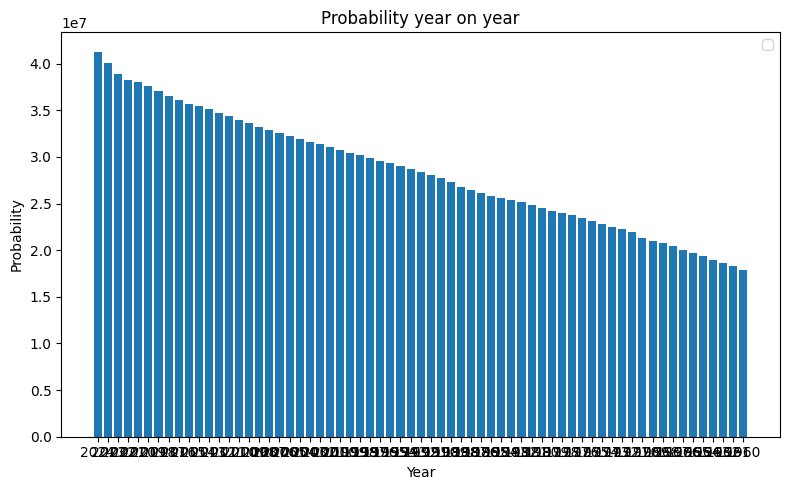

In [13]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_maple_roots['year'], df_maple_roots['c_population'])

plt.title("Probability year on year")
plt.ylabel("Probability")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

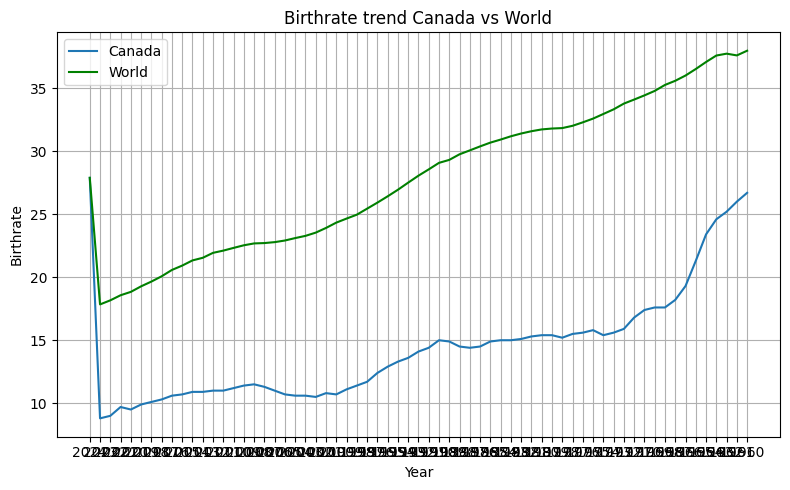

In [14]:
plt.figure(figsize=(8,5))
plt.plot(df_maple_roots['year'],df_maple_roots['c_birthrate'],label=df_maple_roots['country'].iloc[0])
plt.plot(df_maple_roots['year'],df_maple_roots['w_birthrate'],label='World',color='green')

plt.title("Birthrate trend Canada vs World")
plt.ylabel("Birthrate")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# calculate percentage of growth
df_maple_roots['c_birth_growth'] = df_maple_roots['c_birth'].pct_change()
print(df_maple_roots.head())

   index code country  year  c_birthrate  c_population  w_birthrate  \
0   5460  CAN  Canada  2024    27.889887    41288599.0    27.889887   
1   5461  CAN  Canada  2023     8.800000    40083484.0    17.843165   
2   5462  CAN  Canada  2022     9.000000    38935934.0    18.166692   
3   5463  CAN  Canada  2021     9.700000    38239864.0    18.570671   
4   5464  CAN  Canada  2020     9.500000    38028638.0    18.838700   

   w_population       c_birth       w_birth  c_probability  c_birth_growth  
0  8.795003e+10  1.151534e+06  2.452916e+09       0.000469             NaN  
1  8.703543e+10  3.527347e+05  1.552988e+09       0.000227       -0.693683  
2  8.615821e+10  3.504234e+05  1.565210e+09       0.000224       -0.006552  
3  8.531826e+10  3.709267e+05  1.584417e+09       0.000234        0.058510  
4  8.448114e+10  3.612721e+05  1.591515e+09       0.000227       -0.026028  


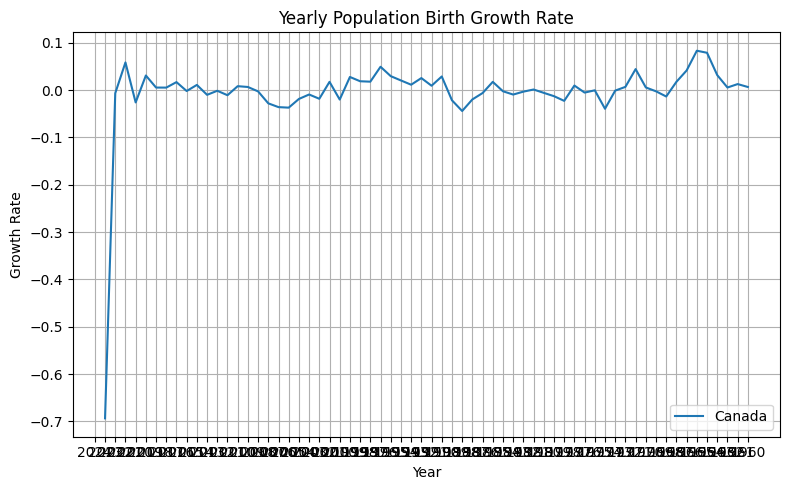

In [16]:
# plot growth rate
plt.figure(figsize=(8,5))
plt.plot(df_maple_roots['year'],df_maple_roots['c_birth_growth'], label=df_maple_roots['country'].iloc[0])

plt.title("Yearly Population Birth Growth Rate")
plt.ylabel("Growth Rate")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# create a table for mample_roots
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
df_maple_roots.to_sql('tbl_maple_roots',conn,if_exists='replace',index=False)
conn.close()

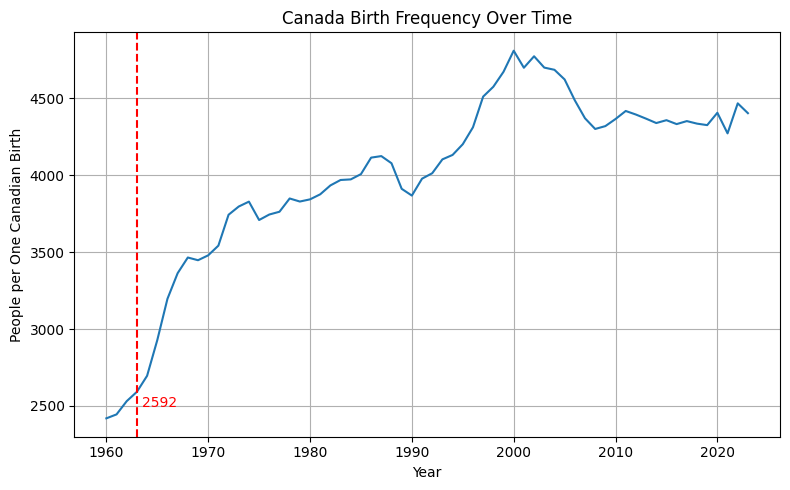

Year: 1963
The chance of being born in Canada in a particular year 1963: 0.0386%
In 1963, for every 2592 people born globally, approximately one was born in Canada.
------


In [18]:
# Show the chance of being born in Canada in a particular year
# table: tbl_maple_roots
import sqlite3

# choice_year = int(input('Enter year between 1960 and 2024:')) or '2020'
while True:
    try:
        choice_year = int(input('Year (1960–2024): ') or 2020)
        if 1960 <= choice_year <= 2024:
            break
    except:
        pass
years = range(1960,2024)
frequencies = []

for year in years:
    quary = f'SELECT c_probability FROM tbl_maple_roots WHERE year={year}'
    conn = sqlite3.connect('mapleroot.db',isolation_level=None)
    probabilty = conn.execute(quary).fetchall()
    conn.close()
    # freq = 1/probabilty[0][0] # this is causing out of range for 2024
    if probabilty and probabilty[0][0] != 0:
        freq = 1 / probabilty[0][0]
    else:
        freq = None  # or you can use np.nan
    frequencies.append(freq)
freq_series = pd.Series(frequencies, index=years)

#plot
plt.figure(figsize=(8, 5))
freq_series.plot(kind='line', title='Canada Birth Frequency Over Time', ylabel='People per One Canadian Birth', xlabel='Year')
plt.axvline(x=choice_year, color='red', linestyle='--', label=f'{choice_year}')
plt.text(choice_year + 0.5, freq_series[choice_year]*0.99, f'{freq_series[choice_year]:.0f}', color='red',fontsize=10,ha='left',va='top')
plt.grid(True)
plt.tight_layout()
plt.show()

#Final Answer
quary = f'SELECT c_probability FROM tbl_maple_roots WHERE year={choice_year}'
conn = sqlite3.connect('mapleroot.db',isolation_level=None)
probabilty = conn.execute(quary).fetchall()
conn.close()
freq = 1/probabilty[0][0]

print(f'Year: {choice_year}')
print(f'The chance of being born in Canada in a particular year {choice_year}: {(probabilty[0][0]*100):.4f}%')
print(f'In {choice_year}, for every {freq:.0f} people born globally, approximately one was born in Canada.')
print('------')